# Employee Data and Attrition Study

**Purpose of this book:** 

To perform a Exploratory Data Analysius (EDA) on  Employee Attriation Data retived from <a href="https://www.kaggle.com/datasets/mrsimple07/employee-attrition-data-prediction">Employee Attrition data prediction</a> 



**Summary on data**

This dataset contains synthetic data for employee attrition with a sample size of 1000 unique listing. 

With Nine (9) columns of data populated for each identifier (i.e masked employee number) with the parameters such as age <sup>1</sup>, gender <sup>2</sup>, department <sup>3</sup>,job title <sup>4</sup>, number of years at the company <sup>5</sup>, satisfaction level <sup>6</sup>, Average working hours per month <sup>7</sup>, promotion in last 5 years <sup>8</sup>, salary (in Euros) <sup>9</sup>.

Here we simulate a scenario ('Attrition') where the various other factors mentioned to influence whether an employee stays with a company or leaves. 

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [274]:
emp_data = pd.read_csv('D:\Rich\MDA\T1\dataset\employee_attrition_data.csv')

## Understanding the Data Sample

In [276]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [277]:
emp_data.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [278]:
emp_data.nunique()

Employee_ID              1000
Age                        35
Gender                      2
Department                  5
Job_Title                   5
Years_at_Company           10
Satisfaction_Level       1000
Average_Monthly_Hours     100
Promotion_Last_5Years       2
Salary                    995
Attrition                   2
dtype: int64

In [279]:
emp_data.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

## EDA on the data

In [281]:
eda_in = emp_data[:700]

In [282]:
eda_in.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [283]:
eda_in = eda_in.rename(columns= {'Employee_ID':'EID','Gender':'M_F',
                        'Department':'dep','Job_Title':'desg','Years_at_Company':'tenur',
                        'Satisfaction_Level':'sscor','Average_Monthly_Hours':'M_Hrs',
                        'Promotion_Last_5Years':'prom','Salary':'sal'})


In [284]:
eda_in.loc[eda_in['M_F'] == 'Male', 'M_F'] = 1
eda_in.loc[eda_in['M_F'] == 'Female', 'M_F'] = 0


**EDA 1** 

To validate if there is any correlation between age, gender and employee tenure with their Attrition

In [286]:
eda_1=eda_in[['Age','M_F','tenur','Attrition']]

In [287]:
eda_1.head()

,Age,M_F,tenur,Attrition
0,27,1,9,0
1,53,0,10,0
2,59,0,8,1
3,42,0,1,0
4,44,0,10,0


In [288]:
num_cols_eda = [n for n in eda_1.columns if eda_in[n].dtypes!='O']

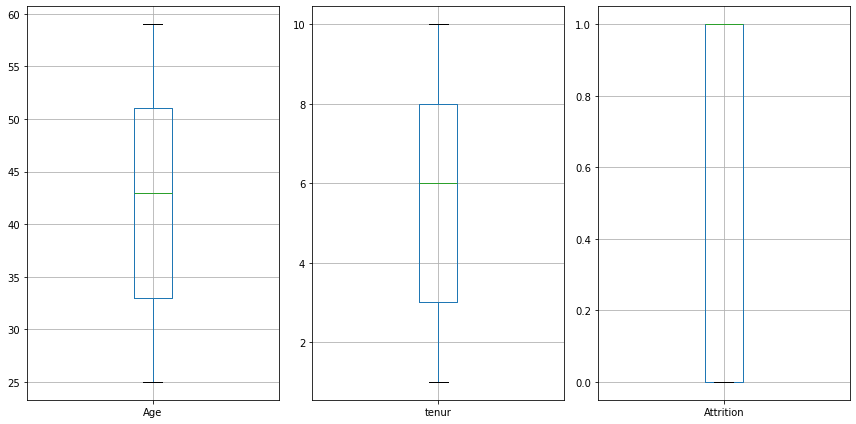

In [289]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    eda_1.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

In [290]:
eda_1.corr()

,Age,M_F,tenur,Attrition
Age,1.000000,0.047364,0.011225,-0.021049
M_F,0.047364,1.000000,0.026030,-0.025966
tenur,0.011225,0.026030,1.000000,-0.029907
Attrition,-0.021049,-0.025966,-0.029907,1.000000


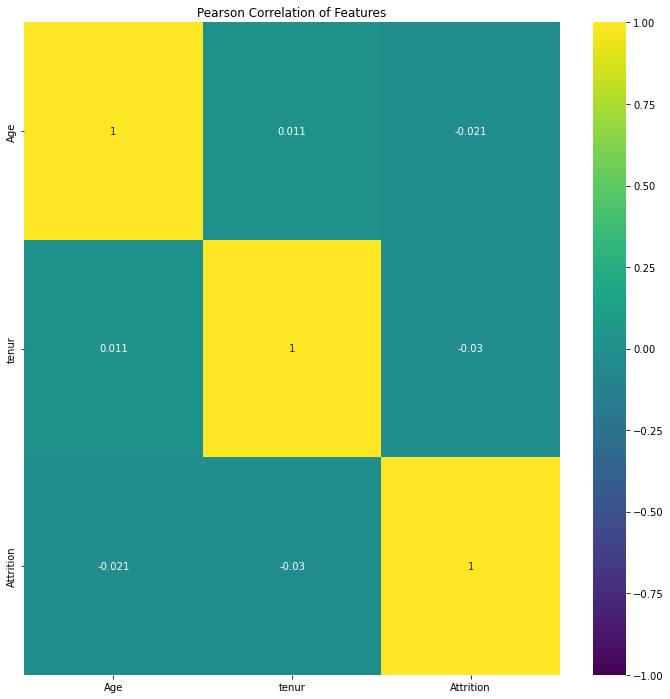

In [291]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size=12)
ax = sns.heatmap(eda_1[num_cols_eda].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

**EDA 2** 

To validate if there is any correlation between employee's monthly effort (average monthly hours), promotion in last 5 years and latest salary.

In [293]:
eda_2=eda_in[['M_Hrs','sal','prom','Attrition']]

In [294]:
eda_2.head()

,M_Hrs,sal,prom,Attrition
0,151,60132,0,0
1,221,79947,1,0
2,184,46958,0,1
3,242,40662,0,0
4,229,74307,1,0


In [295]:
num_cols_eda = [n for n in eda_2.columns if eda_in[n].dtypes!='O']

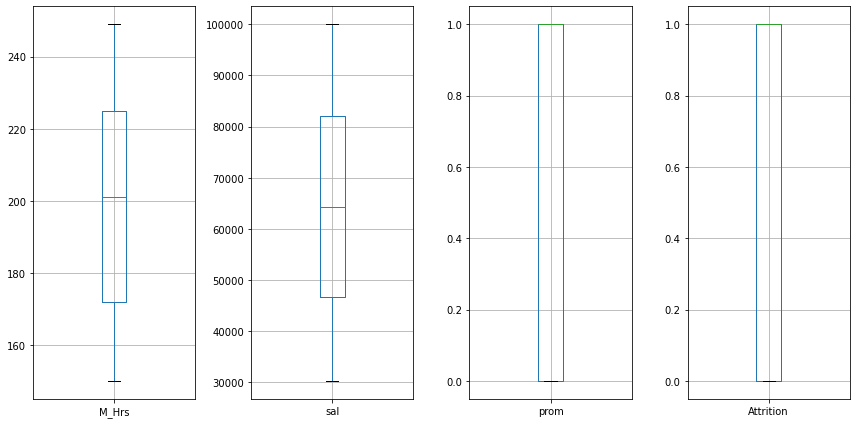

In [296]:
fig, ax = plt.subplots(1,4, figsize=(12,6))
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    eda_2.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

In [297]:
eda_2.corr()

,M_Hrs,sal,prom,Attrition
M_Hrs,1.000000,-0.110622,-0.039940,-0.068749
sal,-0.110622,1.000000,0.023801,-0.047515
prom,-0.039940,0.023801,1.000000,-0.023066
Attrition,-0.068749,-0.047515,-0.023066,1.000000


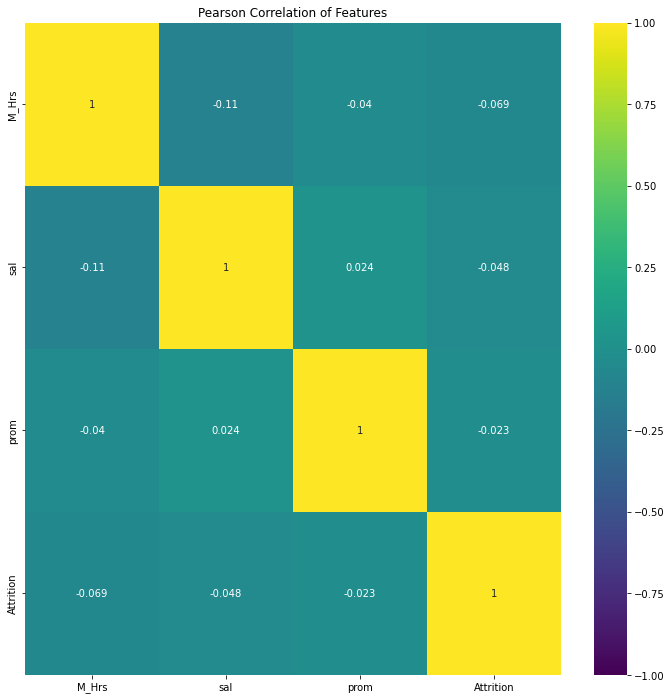

In [298]:

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size=12)
ax = sns.heatmap(eda_2[num_cols_eda].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()